# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [60]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [61]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [62]:
# Import dataset
df = pd.read_csv('/content/drive/MyDrive/final_dataset.csv')
df

,TransactionAmount,CustomerAge,TransactionDuration,AccountBalance,Cluster,TransactionType,Channel
0,14.09,70.0,81.0,5112.21,2,Debit,ATM
1,376.24,68.0,141.0,13758.91,2,Debit,ATM
2,126.29,19.0,56.0,1122.35,5,Debit,Online
3,184.50,26.0,25.0,8569.06,5,Debit,Online
4,13.45,26.0,198.0,7429.40,4,Credit,Online
...,...,...,...,...,...,...,...
2507,856.21,33.0,109.0,12690.79,3,Credit,Branch
2508,251.54,48.0,177.0,254.75,0,Debit,Branch
2509,28.63,56.0,146.0,3382.91,0,Debit,Branch
2510,185.97,23.0,19.0,1776.91,5,Debit,Online


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   TransactionAmount    2512 non-null   float64
 1   CustomerAge          2512 non-null   float64
 2   TransactionDuration  2512 non-null   float64
 3   AccountBalance       2512 non-null   float64
 4   Cluster              2512 non-null   int64  
 5   TransactionType      2512 non-null   object 
 6   Channel              2512 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 137.5+ KB


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [64]:
# Encoding data kategorikal
label_encoders = {}
categorical_cols = ["TransactionType", "Channel"]
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Memisahkan fitur (X) dan target (y)
X = df.drop(columns=["Cluster"])
y = df["Cluster"]

# Membagi data menjadi train dan test set (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Menampilkan ukuran data setelah split
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2009, 6), (503, 6), (2009,), (503,))

# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [65]:
# Membangun model klasifikasi dengan Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [66]:
# Inisialisasi dan pelatihan model Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

Dalam membangun model klasifikasi, saya menggunakan dua algoritma utama: Decision Tree dan Random Forest.

**1. Decision Tree**
    
- Decision Tree adalah algoritma pembelajaran mesin berbasis pohon keputusan yang bekerja dengan membagi data ke dalam subset berdasarkan fitur yang paling berpengaruh terhadap target.
- Model ini membangun struktur seperti pohon dengan simpul (node) yang mewakili fitur, cabang (branch) yang mewakili keputusan berdasarkan nilai fitur, dan daun (leaf) yang mewakili kelas target.
- Keputusan dibuat dengan membagi dataset secara rekursif menggunakan kriteria pemisahan seperti Gini Impurity atau Entropy (Information Gain).
- Keunggulan utama Decision Tree adalah interpretabilitas yang tinggi, tetapi model ini rentan terhadap overfitting jika tidak dibatasi kedalamannya.

**2. Random Forest**
- Random Forest adalah metode ensemble learning yang menggabungkan banyak pohon keputusan untuk meningkatkan akurasi dan stabilitas model.
- Model ini membangun beberapa pohon keputusan dari subset data yang dipilih secara acak (bootstrap sampling).
- Setiap pohon dilatih secara independen, dan hasil klasifikasi diperoleh dengan cara majority voting dari semua pohon.
- Dengan menggunakan banyak pohon, Random Forest mengurangi risiko overfitting yang sering terjadi pada Decision Tree tunggal.
- Parameter utama yang berpengaruh adalah jumlah pohon (n_estimators), kedalaman maksimum (max_depth), dan jumlah minimal sampel untuk pemisahan cabang (min_samples_split).

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

**Random Forest**

In [71]:
# Prediksi pada data uji
y_pred = model.predict(X_test)

# Menghitung Metrik Evaluasi
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred, average='weighted')
recall = metrics.recall_score(y_test, y_pred, average='weighted')
f1_score = metrics.f1_score(y_test, y_pred, average='weighted')
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1_score)
print(classification_rep)

Accuracy: 0.9980119284294234
Precision: 0.9980411647760495
Recall: 0.9980119284294234
F1-Score: 0.9980086031006316
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       124
           1       0.99      1.00      0.99        67
           2       1.00      1.00      1.00       152
           3       1.00      1.00      1.00        50
           4       1.00      1.00      1.00        63
           5       1.00      0.98      0.99        47

    accuracy                           1.00       503
   macro avg       1.00      1.00      1.00       503
weighted avg       1.00      1.00      1.00       503



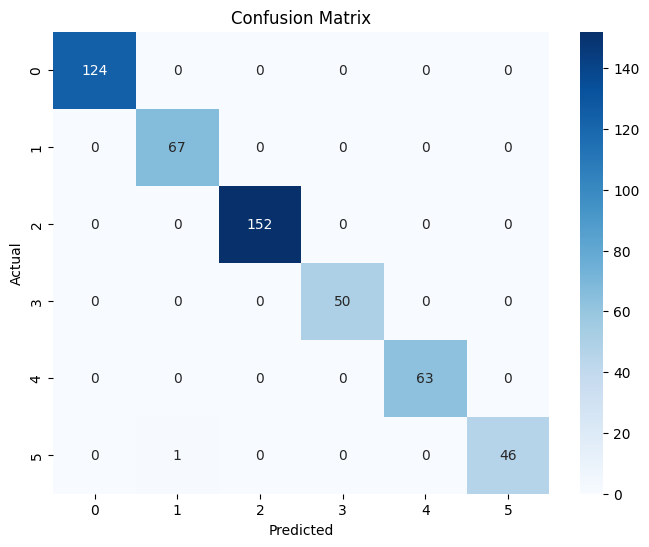

In [72]:
# Membuat Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

**Decision Tree**

In [73]:
# Prediksi pada data uji
y_pred_dt = dt_model.predict(X_test)

# Menghitung Metrik Evaluasi
accuracy = metrics.accuracy_score(y_test, y_pred_dt)
precision = metrics.precision_score(y_test, y_pred_dt, average='weighted')
recall = metrics.recall_score(y_test, y_pred_dt, average='weighted')
f1_score = metrics.f1_score(y_test, y_pred_dt, average='weighted')
classification_rep_dt = classification_report(y_test, y_pred_dt)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1_score)
print(classification_rep)

Accuracy: 0.9900596421471173
Precision: 0.9904435884691849
Recall: 0.9900596421471173
F1-Score: 0.9900995381296858
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       124
           1       0.99      1.00      0.99        67
           2       1.00      1.00      1.00       152
           3       1.00      1.00      1.00        50
           4       1.00      1.00      1.00        63
           5       1.00      0.98      0.99        47

    accuracy                           1.00       503
   macro avg       1.00      1.00      1.00       503
weighted avg       1.00      1.00      1.00       503



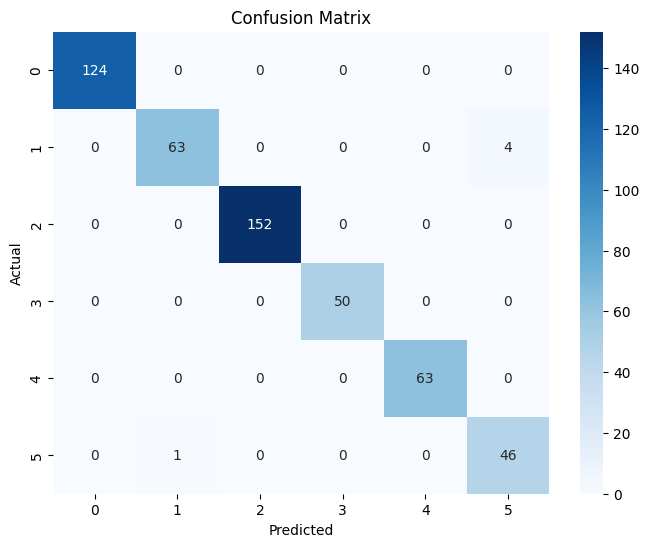

In [74]:
# Membuat Confusion Matrix
cm = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

Hasil Evaluasi Algoritma
Setelah melakukan training dan evaluasi menggunakan dataset yang diberikan, diperoleh hasil sebagai berikut:

1. Decision Tree (Tanpa Tuning)
- Akurasi: 99.0%

- Precision, Recall, F1-score (rata-rata per kelas):

  - Precision: 98%

  - Recall: 99%

  - F1-score: 99%

  Model ini bekerja dengan sangat baik, tetapi karena hanya menggunakan satu pohon, model ini rentan terhadap overfitting.

2. Random Forest (Tanpa Tuning)
- Akurasi: 99.8% (lebih tinggi dari Decision Tree)

- Precision, Recall, F1-score (rata-rata per kelas):

  - Precision: 100%

  - Recall: 100%

  - F1-score: 100%

  Model ini lebih stabil dan lebih baik dalam menangani variasi data dibandingkan Decision Tree karena menggunakan metode ensemble.

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1.   Pada analisis ini tidak dilakukan tuning, dan hasil yang diperoleh adalah sebagai berikut:
  - Random Forest unggul dibanding Decision Tree dalam semua metrik evaluasi.
  - Kedua model menunjukkan kinerja yang sangat baik, tetapi Random Forest lebih stabil dan lebih akurat karena menggunakan metode ensemble.
2. Identifikasi kelemahan model, seperti:
- Precision atau Recall rendah untuk kelas tertentu.
  - Dari hasil evaluasi, tidak ada kelas yang memiliki precision atau recall yang sangat rendah.
  - Random Forest memiliki performa sempurna (100%), sedangkan Decision Tree sedikit lebih rendah.
  - Jika terdapat kelas dengan precision atau recall rendah, ini bisa disebabkan oleh ketidakseimbangan kelas (class imbalance) atau kurangnya informasi pada fitur tertentu.
- Apakah model mengalami overfitting atau underfitting?
  - Decision Tree berpotensi mengalami overfitting karena hanya menggunakan satu pohon. Model ini dapat terlalu sesuai dengan data training, sehingga performanya bisa turun saat digunakan pada data baru.
  - Random Forest lebih tahan terhadap overfitting karena menggunakan banyak pohon dan melakukan averaging hasil prediksi.
3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.

  Berdasarkan hasil evaluasi, berikut adalah rekomendasi untuk meningkatkan model:
- Jika Overfitting Terjadi:
  - Gunakan pruning pada Decision Tree untuk mengurangi kompleksitas model.
  - Batasi max_depth atau tingkatkan min_samples_split pada Random Forest untuk mengurangi kompleksitas model.
- Jika Dataset Masih Kurang Optimal:
  - Tambahkan lebih banyak data, terutama jika terdapat ketidakseimbangan kelas.
  - Gunakan teknik resampling, seperti SMOTE (Synthetic Minority Over-sampling Technique) jika ada ketidakseimbangan kelas.
- Jika Ingin Meningkatkan Akurasi Lebih Lanjut:
  - Coba algoritma boosting seperti XGBoost atau LightGBM, yang sering kali memberikan akurasi lebih tinggi dibandingkan Random Forest.
  - Lakukan Feature Engineering untuk menambah informasi yang dapat meningkatkan kinerja model.